In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lgr
from sklearn import metrics

In [3]:
# Import data
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Drop unwatned columns
df.drop(['id', 'Unnamed: 32'], axis= 1, inplace = True)

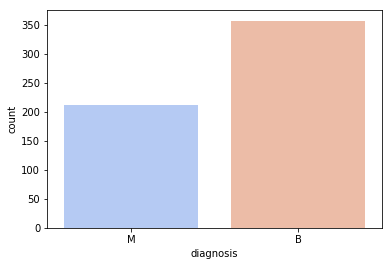

In [5]:
# Diagnosis histogram
sns.countplot(df['diagnosis'], palette='coolwarm')
plt.show()

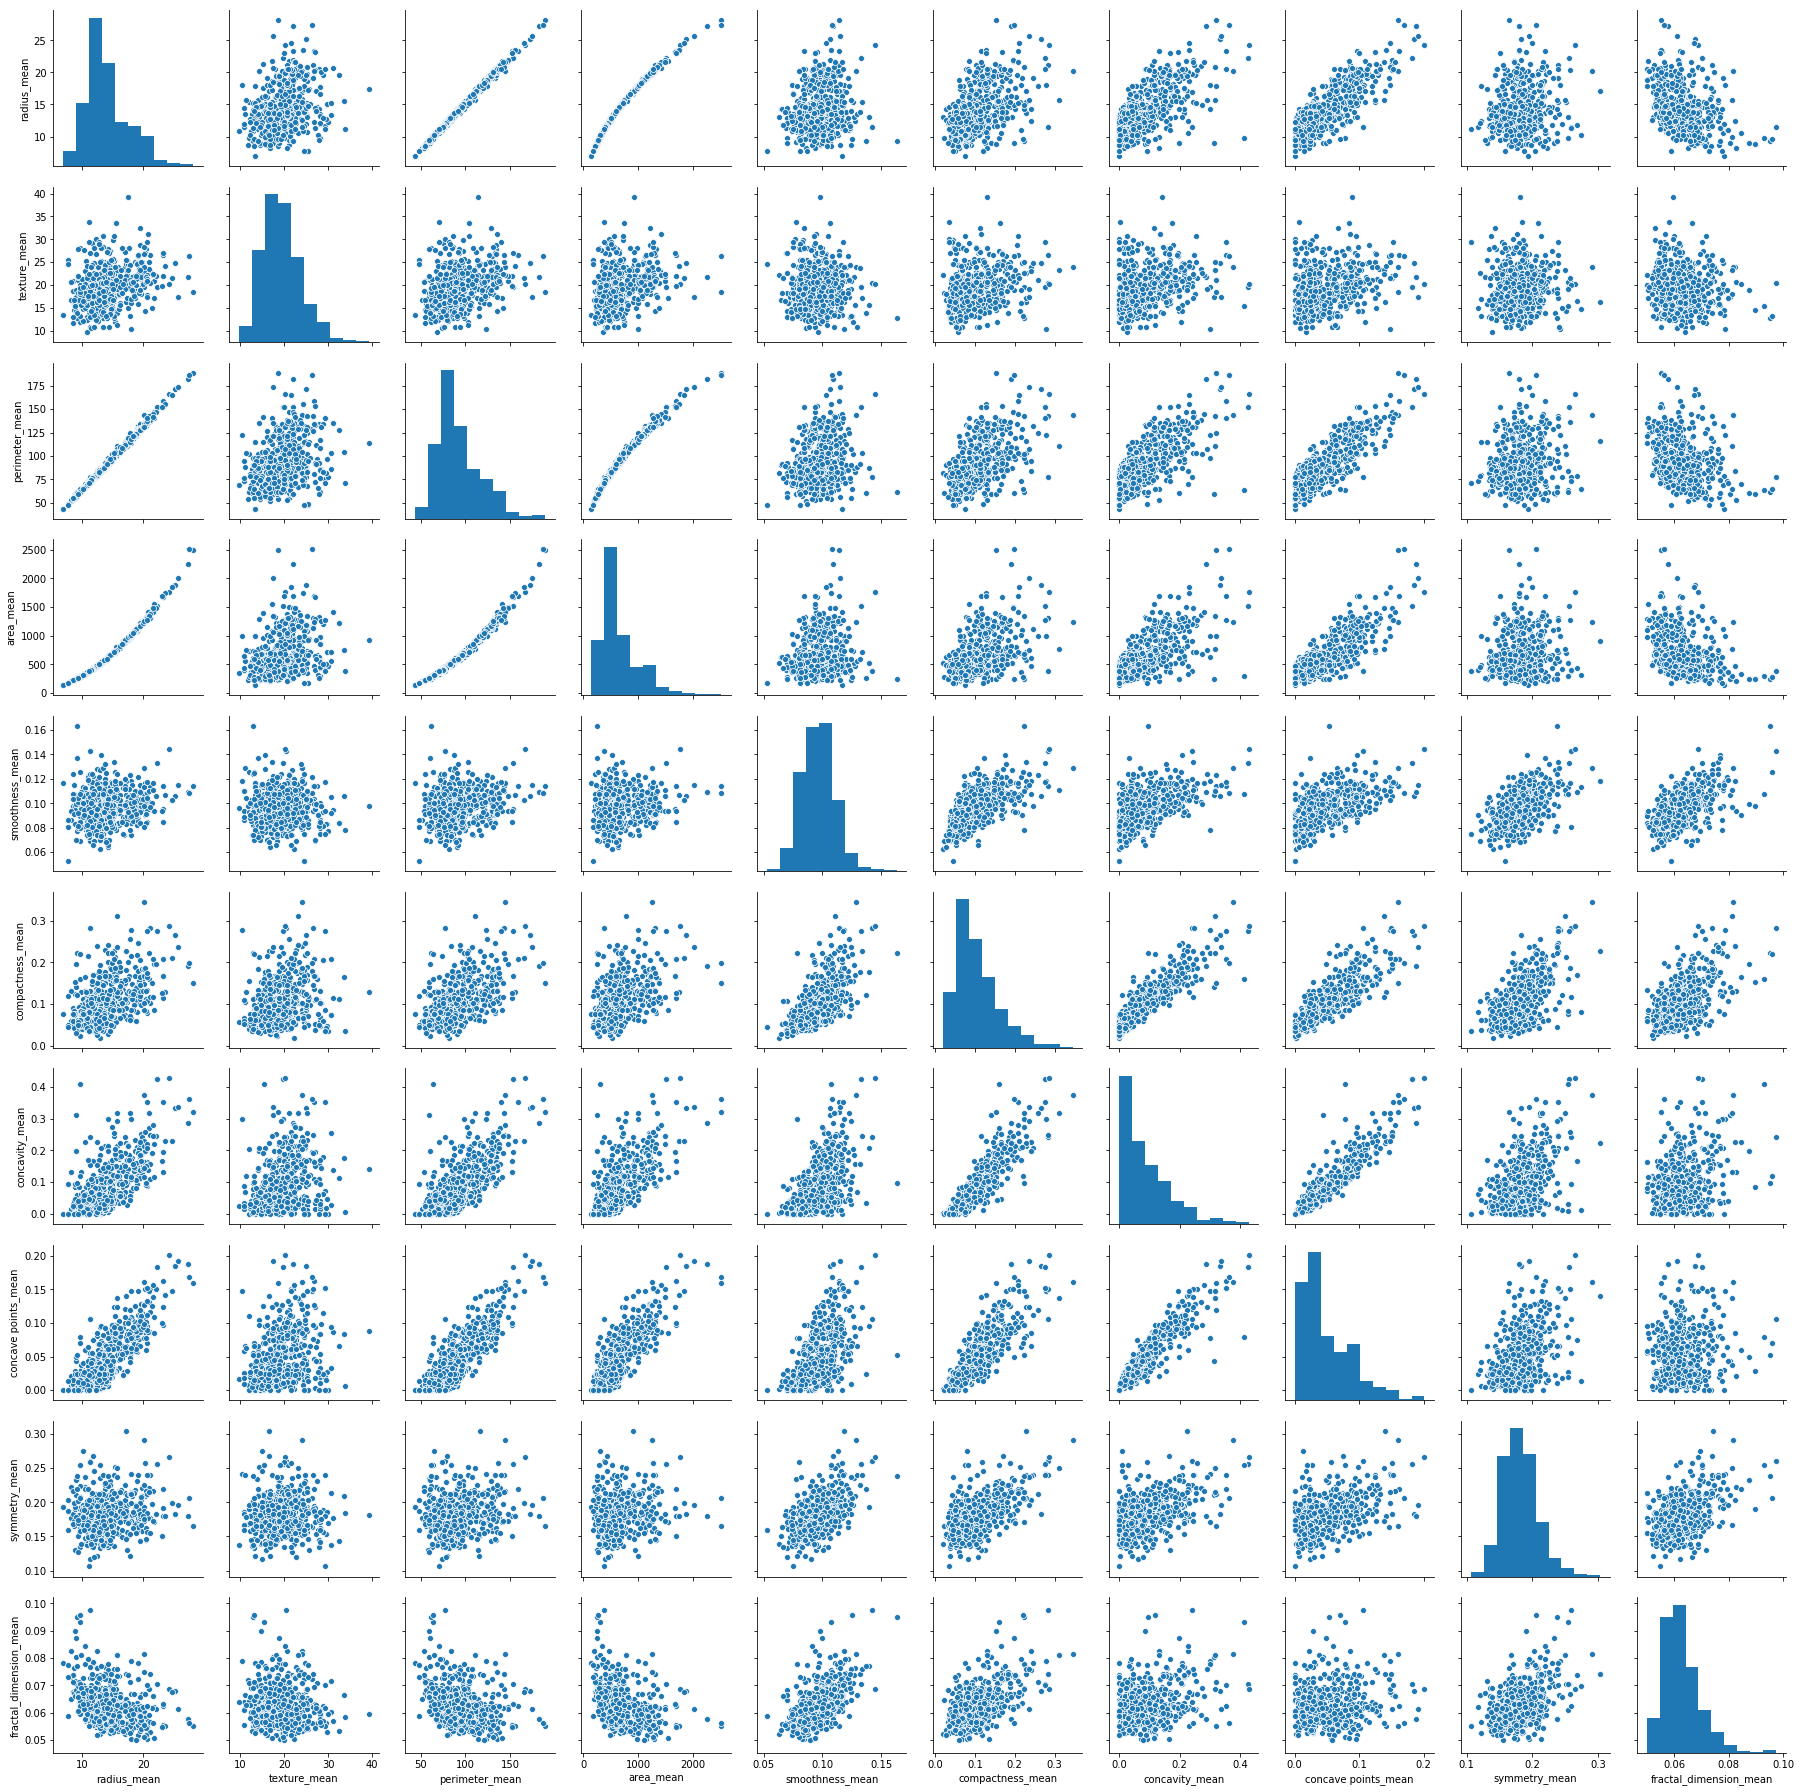

In [6]:
# Examine features - pairplot
mean_cols = [col for col in df.columns if 'mean' in col]
sns.pairplot(data=df[mean_cols])
plt.show()

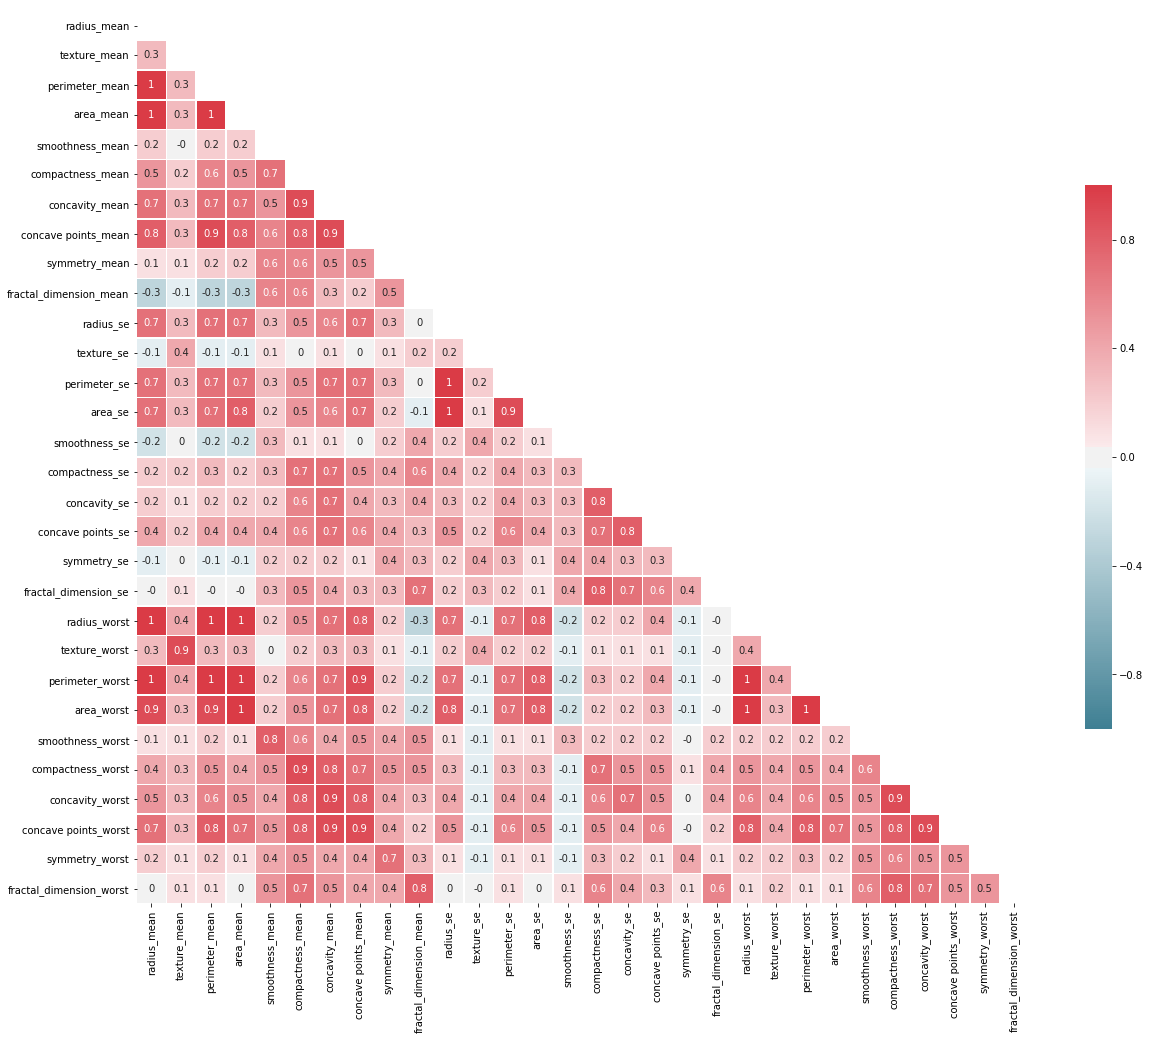

In [7]:
# Examine features - CM
corr = df.corr().round(1)

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink":0.5}, linewidths=0.5, annot=True)
plt.show()

In [8]:
# Drop some columns (drop the complement of the columns defined below)
df.drop(df.columns.difference(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', \
                               'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',\
                              'smoothness_se','compactness_se', 'symmetry_se','fractal_dimension_se']), axis = 1, inplace=True)

In [9]:
# Select data
x = df.iloc[:,1:13].values
y = df.iloc[:,0].values

# Enclode categorial var
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

# Split training and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

# Scaling
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# Log regression
log_reg = lgr(solver='lbfgs')
log_reg.fit(x_train, y_train)

# Make predictions on test data
p_pred = log_reg.predict_proba(x_test) # predicted p for each class
y_pred = log_reg.predict(x_test) # predicted outcome

In [11]:
# Model evaluation
print(metrics.classification_report(y_test, y_pred))
print("Accuracy of the model:", round(metrics.accuracy_score(y_test,y_pred)*100),"%")

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        87
           1       0.89      0.88      0.88        56

   micro avg       0.91      0.91      0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143

Accuracy of the model: 91.0 %
